# Proyecto 2 - Minería de Datos

### Integrantes:
- Carlos Valladares - 221164
- Brandon Reyes - 22992

1. Importación de librerías a utilizar

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Cargar el dataset
df = pd.read_csv("./train.csv")

En primer lugar veamos la información general del dataset:

In [2]:
# Mostrar información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Ahora veamos la descripción estadística de las variables numéricas:

In [3]:
# Descripción estadística de las variables numéricas
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Identifiquemos los valores nulos:

In [11]:
# Identificación de valores nulos
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]
print("Valores nulos por columna:")
print(missing_values)

Valores nulos por columna:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


También identificamos la distribución de la variable respuesta "SalePrice"

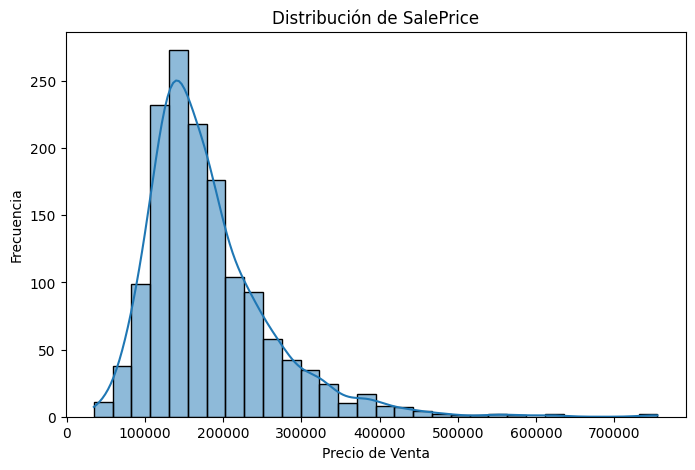

In [5]:
# Distribución de la variable respuesta 'SalePrice'
plt.figure(figsize=(8, 5))
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title("Distribución de SalePrice")
plt.xlabel("Precio de Venta")
plt.ylabel("Frecuencia")
plt.show()

Es necesario convertir las variables categóricas a numérico para analizar la correlación con SalePrice

In [10]:
# Convertir variables categóricas a numérico para el análisis de correlación
df_numeric = df.select_dtypes(include=[np.number])

# Análisis de correlación con 'SalePrice'
correlation = df_numeric.corr()["SalePrice"].sort_values(ascending=False)
print("Correlación de variables con SalePrice:")
print(correlation.head(10))

Correlación de variables con SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


Mapa de calor de correlaciones

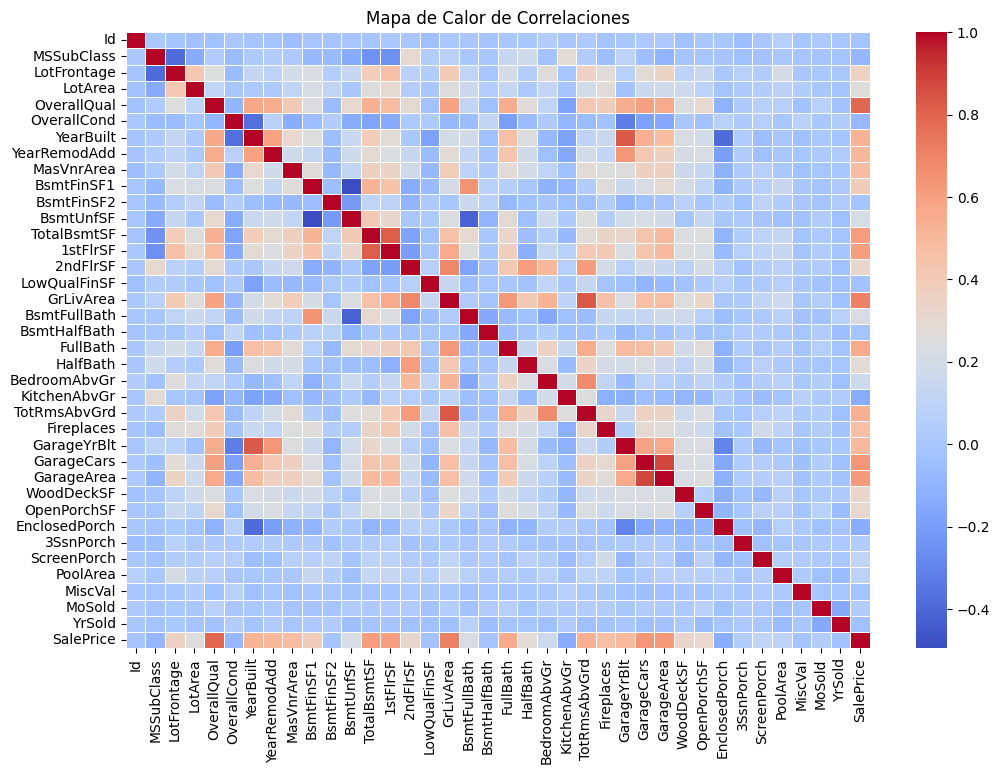

In [9]:
# Mapa de calor de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Mapa de Calor de Correlaciones")
plt.show()

Analizamos la relación entre "GrLivArea" y "SalePrice"

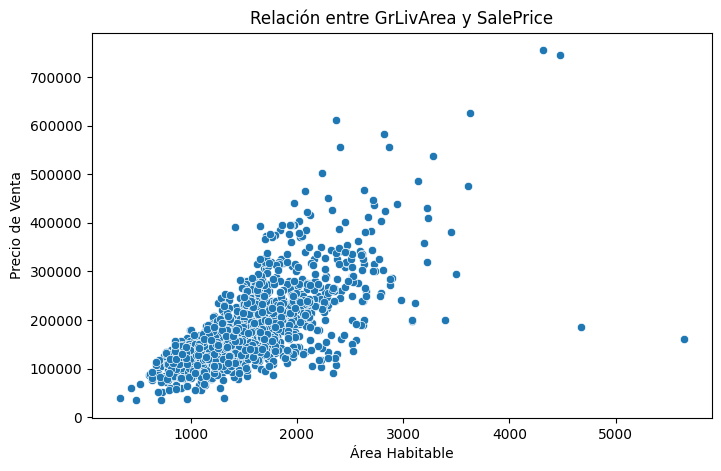

In [13]:
# Relación entre 'GrLivArea' y 'SalePrice'
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'])
plt.title("Relación entre GrLivArea y SalePrice")
plt.xlabel("Área Habitable")
plt.ylabel("Precio de Venta")
plt.show()

De igual manera analizamos la relación entre "OverallQual" y "SalePrice"

Es necesario también analizar la relación entre "Neighborhood" y "SalePrice"